## Problem Statement:
Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

 

### The Process:
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

### Other things to note:
* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
* For a few camps, there was hardware failure, so some information about date and time of registration is lost.
* MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.
* **Favorable outcome:**
* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.

In [1]:
#Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [2]:
#Import datasets:

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

first_hc=pd.read_csv('First_Health_Camp_Attended.csv')
second_hc=pd.read_csv('Second_Health_Camp_Attended.csv')
third_hc=pd.read_csv('Third_Health_Camp_Attended.csv')
hc_detail=pd.read_csv('Health_Camp_Detail.csv')
profile=pd.read_csv('Patient_Profile.csv')

In [3]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7


In [4]:
test.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0


In [5]:
first_hc.head(2)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN


In [6]:
second_hc.head(2)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700


In [7]:
third_hc.head(2)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1


In [8]:
hc_detail.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [9]:
profile.head(2)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry


In [10]:
#Combine train & test set:
combined=pd.concat([train,test],ignore_index=True)

In [11]:
combined.shape, train.shape, test.shape

((110527, 8), (75278, 8), (35249, 8))

In [12]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


**Merge/Join all the health camps data with combined data:**

In [13]:
combined=pd.merge(combined,first_hc,on=['Patient_ID','Health_Camp_ID'],how='left')
combined=pd.merge(combined,second_hc,on=['Patient_ID','Health_Camp_ID'],how='left')
combined=pd.merge(combined,third_hc,on=['Patient_ID','Health_Camp_ID'],how='left')

In [14]:
#Merging hc_detail with combined:
combined=pd.merge(combined,hc_detail,on=['Health_Camp_ID'],how='left')

In [15]:
#Profile with combined:
combined=pd.merge(combined,profile,on=['Patient_ID'],how='left')

In [16]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others


In [17]:
combined.shape

(110527, 29)

In [18]:
combined['Unnamed: 4'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 4, dtype: float64

In [19]:
#Drop Unnamed: 4
combined.drop('Unnamed: 4', axis=1,inplace=True)

In [20]:
#Combining all online activity:
combined['Online_Activity']=combined.Online_Follower+combined.LinkedIn_Shared+combined.Twitter_Shared+combined.Facebook_Shared

In [21]:
combined.Online_Activity.value_counts(normalize=True)

0    0.895166
2    0.035855
1    0.032363
3    0.027278
4    0.009337
Name: Online_Activity, dtype: float64

In [22]:
#Convert to datetime:
combined['Registration_Date']=pd.to_datetime(combined.Registration_Date,dayfirst=True)
combined['Camp_Start_Date']=pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
combined['Camp_End_Date']=pd.to_datetime(combined.Camp_End_Date,dayfirst=True)
combined['First_Interaction']=pd.to_datetime(combined.First_Interaction,dayfirst=True)

In [23]:
#Interaction Days:
combined['Interaction_Days']=(combined.Registration_Date - combined.First_Interaction).dt.days

In [24]:
combined.Interaction_Days.describe()

count    110193.000000
mean        249.117076
std         326.026614
min           0.000000
25%           8.000000
50%          77.000000
75%         420.000000
max        1543.000000
Name: Interaction_Days, dtype: float64

In [25]:
#Camp Duration:
combined['Camp_Duration']=np.abs((combined.Camp_End_Date - combined.Camp_Start_Date).dt.days)

In [26]:
#Camp Start Date - Registration Date:
combined['Headstart']=np.abs((combined.Camp_Start_Date - combined.Registration_Date).dt.days)

In [27]:
#Camp End Date - Registration Date:
combined['Camp_End_Reg_Duration']=np.abs((combined.Camp_End_Date - combined.Registration_Date).dt.days)

In [28]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_End_Reg_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0


In [29]:
#Registration Day:
combined['Registration_Day']=combined.Registration_Date.dt.day

#Registration Month:
combined['Registration_Month']=combined.Registration_Date.dt.month

#Registration Year:
combined['Registration_Year']=combined.Registration_Date.dt.year

In [35]:
#Camp Start & End Year:
combined['Camp_Start_Year']=combined.Camp_Start_Date.dt.year
combined['Camp_End_Year']=combined.Camp_End_Date.dt.year

#Camp Start & End Month:
combined['Camp_Start_Month']=combined.Camp_Start_Date.dt.month
combined['Camp_End_Month']=combined.Camp_End_Date.dt.month

In [36]:
combined['Camp_Duration_Month']=np.abs(combined.Camp_End_Month-combined.Camp_Start_Month)

In [41]:
#No. of patients every day/month/year & date:
combined['Patient_Per_Day']=combined.groupby('Registration_Day')['Patient_ID'].transform('nunique')
combined['Patient_Per_Month']=combined.groupby('Registration_Month')['Patient_ID'].transform('nunique')
combined['Patient_Per_Year']=combined.groupby('Registration_Year')['Patient_ID'].transform('nunique')
combined['Patient_Count_Reg_Date']=combined.groupby('Registration_Date')['Patient_ID'].transform('nunique')

In [48]:
#Unique no. of Health Camps occurred during that date:
combined['Health_Camp_Count']=combined.groupby('Registration_Date')['Health_Camp_ID'].transform('nunique')

In [50]:
#No. of patients in the healthcamps:
combined['Patient_HC_Count']=combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')

In [51]:
#No. of health camps every month:
combined['Health_Camp_Month_FC']=combined.groupby('Camp_End_Month')['Health_Camp_ID'].transform('nunique')

#No. of health camps every year:
combined['Health_Camp_Year_FC']=combined.groupby('Camp_End_Year')['Health_Camp_ID'].transform('nunique')

### Creating target variable:
**Favorable outcome:**
* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.

In [52]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_End_Reg_Duration,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Patient_Count_Reg_Date,Health_Camp_Count,Patient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC
0,489652,6578,2005-09-10,4,0,0,0,2,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,2649.0,6585.0,15710.0,106.0,4.0,2837,5,19
1,507246,6578,2005-08-18,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,0,0,0,1,75,40,2004-09-08,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,3620.0,5804.0,15710.0,134.0,6.0,2837,5,19


In [66]:
#defnied as getting a health score & health_score - yes/no
#visiting a stall - yes/no

#If Health_Score>0 or Health Score>0 or Number_of_stall_visited>0 or Last_Stall_Visited_Number>0 then 1, else 0

def target(hs1,hs2,sv,snum):
    if ((hs1>0) or (hs2>0) or (sv>0) or (snum>0)):
        return (1)
    else:
        return (0)

In [75]:
combined['Target']=combined.apply(lambda x: target(x['Health_Score'],x['Health Score'],x['Number_of_stall_visited'],x['Last_Stall_Visited_Number']),axis=1)

In [77]:
combined.Target.value_counts(normalize=True)

0    0.814217
1    0.185783
Name: Target, dtype: float64

In [78]:
#Drop the unwanted vars:

new=combined.drop(['Donation','Health_Score','Health Score',
                   'Number_of_stall_visited','Last_Stall_Visited_Number',
                   'Camp_Start_Date','Camp_End_Date','Registration_Date',
                   'Online_Follower','LinkedIn_Shared','Twitter_Shared',
                  'Facebook_Shared','First_Interaction','Patient_ID',
                  'Health_Camp_ID'],axis=1)

In [80]:
combined.shape, new.shape, train.shape

((110527, 50), (110527, 35), (75278, 8))

In [81]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_End_Reg_Duration,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Patient_Count_Reg_Date,Health_Camp_Count,Patient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,Third,G,2,None,None,None,NaN,NaN,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,2649.0,6585.0,15710.0,106.0,4.0,2837,5,19,1
1,45,5,0,0,7,Third,G,2,1,75,40,C,Others,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,3620.0,5804.0,15710.0,134.0,6.0,2837,5,19,0
2,0,0,0,0,0,Second,A,2,None,None,None,NaN,NaN,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,2518.0,4785.0,19318.0,65.0,4.0,3597,8,9,1
3,0,0,0,0,0,First,E,2,None,None,None,I,NaN,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,2363.0,5029.0,9646.0,139.0,3.0,1882,6,14,0
4,15,1,0,0,7,Second,A,2,1,70,40,I,Technology,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,3012.0,5029.0,19318.0,58.0,6.0,3823,5,18,1


In [83]:
#Replace None with np.nan:
new.replace(to_replace='None',value=np.nan,inplace=True)

<AxesSubplot:>

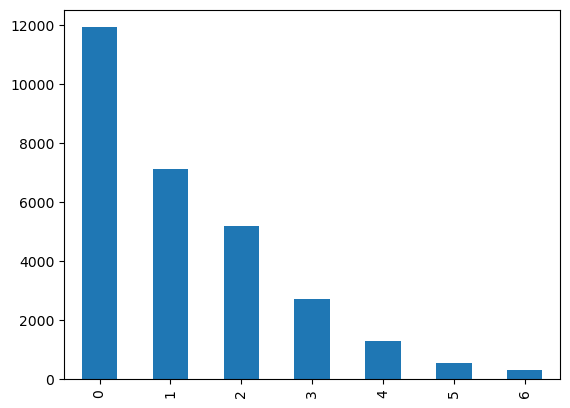

In [86]:
new.Income.value_counts().plot(kind='bar')

In [91]:
pd.DataFrame(pd.factorize(new.Income)[0])[0].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [92]:
new.loc[new.Income.isnull(),'Target'].value_counts()

0    68065
1    13277
Name: Target, dtype: int64

In [93]:
new.loc[new.Income.notnull(),'Target'].value_counts()

0    21928
1     7257
Name: Target, dtype: int64

In [95]:
#Apply factorize to convert np.nan to some number:
new['Income']=pd.factorize(new.Income)[0]
new['Education_Score']=pd.factorize(new.Education_Score)[0]
new['City_Type']=pd.factorize(new.City_Type)[0]

In [96]:
new.Age.describe()

count     32602
unique       50
top          41
freq       2568
Name: Age, dtype: object

In [97]:
#Since age is also categorical, we can factorize it:
new['Age']=pd.factorize(new.Age)[0]
new['Employer_Category']=pd.factorize(new.Employer_Category)[0]

In [100]:
#Missing value columns:
cols=new.isnull().sum()[new.isnull().sum()!=0].index

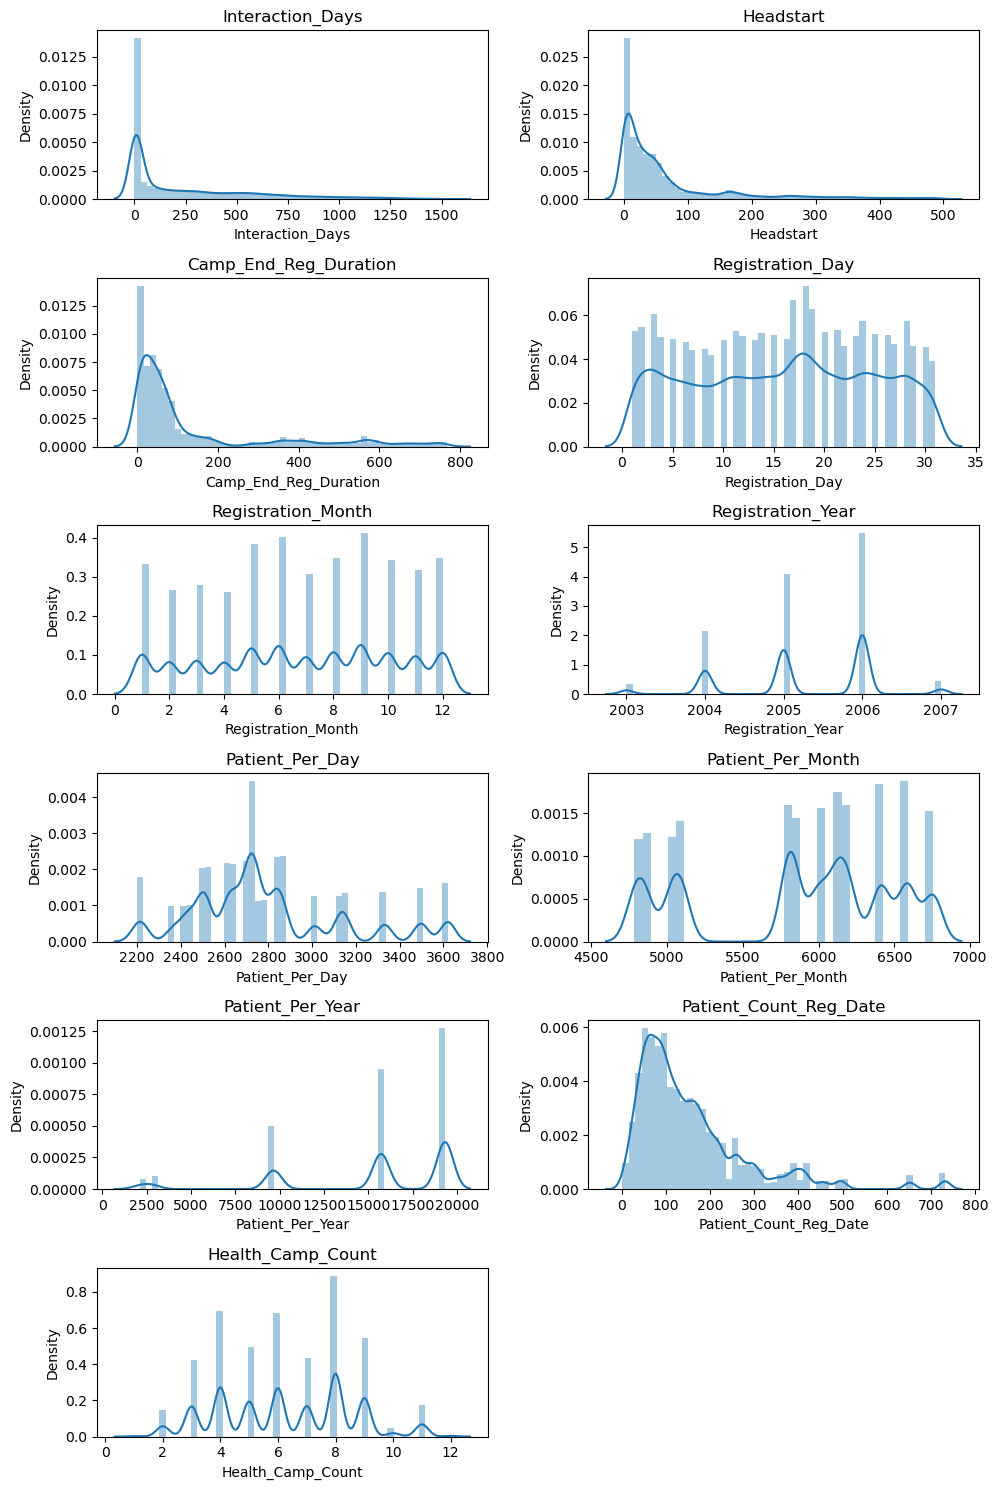

In [102]:
#Plot:
nrows=6
ncols=2
rep=1
plt.figure(figsize=(10,15))

for i in cols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(new.loc[:,i])
    plt.title(i)
    rep+=1

plt.tight_layout()
plt.show()

In [103]:
#Imputing with median:
for i in cols:
    new.loc[:,i].fillna(new.loc[:,i].median(),inplace=True)

In [107]:
new.isnull().sum().sum()

0

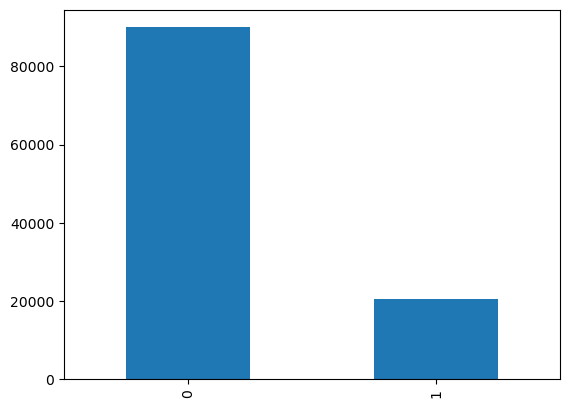

In [108]:
#Check Target Vars:
new.Target.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Category1'>

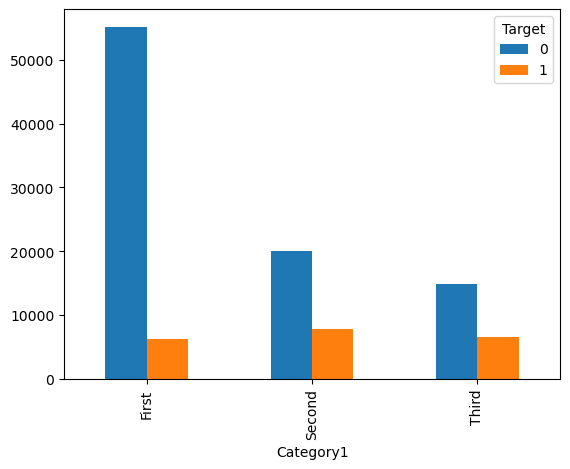

In [111]:
#Checking pattern between Category1, Category2 & Category3 and target:
pd.crosstab(new.Category1,new.Target).plot(kind='bar')

<AxesSubplot:xlabel='Category2'>

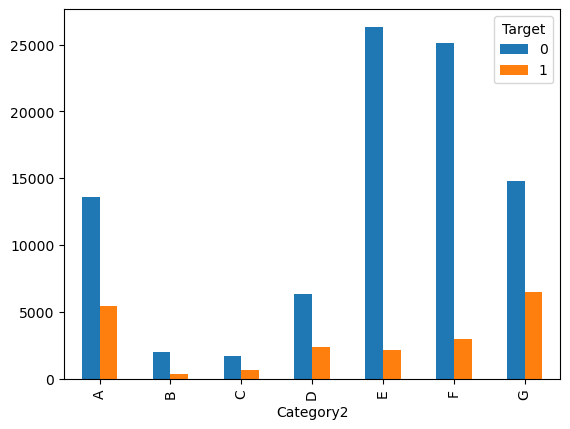

In [112]:
pd.crosstab(new.Category2,new.Target).plot(kind='bar')

<AxesSubplot:xlabel='Category3'>

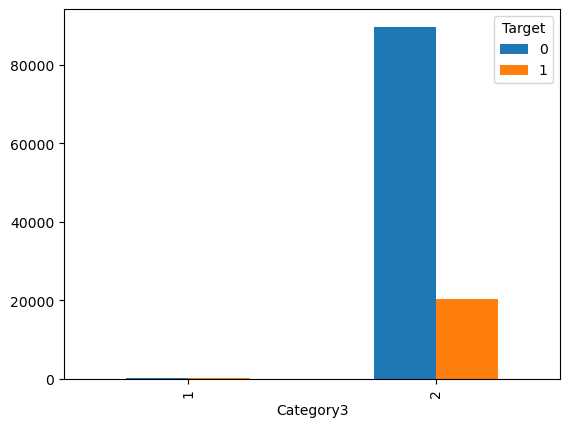

In [113]:
pd.crosstab(new.Category3,new.Target).plot(kind='bar')

#### Hypothesis Testing:

In [114]:
#Apply Chi Square Test to check if the Cats have any relation with Target.

#Ho: That category1 & Target are independent of each other
#Ha: That category1 has contribution towards predicting Target

In [116]:
import scipy.stats as stats

tbl=pd.crosstab(new.Category1,new.Target)

teststats, pvalue, dof, exp_freq=stats.chi2_contingency(tbl)

print(pvalue)

0.0


In [117]:
new.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Category1', 'Category2',
       'Category3', 'Income', 'Education_Score', 'Age', 'City_Type',
       'Employer_Category', 'Online_Activity', 'Interaction_Days',
       'Camp_Duration', 'Headstart', 'Camp_End_Reg_Duration',
       'Registration_Day', 'Registration_Month', 'Registration_Year',
       'Camp_Start_Year', 'Camp_End_Year', 'Camp_Start_Month',
       'Camp_End_Month', 'Camp_Duration_Month', 'Patient_Per_Day',
       'Patient_Per_Month', 'Patient_Per_Year', 'Patient_Count_Reg_Date',
       'Health_Camp_Count', 'Patient_HC_Count', 'Health_Camp_Month_FC',
       'Health_Camp_Year_FC', 'Target'],
      dtype='object')

In [120]:
for i in new.columns:
    tbl=pd.crosstab(new.loc[:,i],new.Target)
    teststats, pvalue, dof, exp_freq=stats.chi2_contingency(tbl)
    print('pvalue for',i,'is:',np.round(pvalue))

pvalue for Var1 is: 0.0
pvalue for Var2 is: 0.0
pvalue for Var3 is: 0.0
pvalue for Var4 is: 0.0
pvalue for Var5 is: 0.0
pvalue for Category1 is: 0.0
pvalue for Category2 is: 0.0
pvalue for Category3 is: 0.0
pvalue for Income is: 0.0
pvalue for Education_Score is: 0.0
pvalue for Age is: 0.0
pvalue for City_Type is: 0.0
pvalue for Employer_Category is: 0.0
pvalue for Online_Activity is: 0.0
pvalue for Interaction_Days is: 0.0
pvalue for Camp_Duration is: 0.0
pvalue for Headstart is: 0.0
pvalue for Camp_End_Reg_Duration is: 0.0
pvalue for Registration_Day is: 0.0
pvalue for Registration_Month is: 0.0
pvalue for Registration_Year is: 0.0
pvalue for Camp_Start_Year is: 0.0
pvalue for Camp_End_Year is: 0.0
pvalue for Camp_Start_Month is: 0.0
pvalue for Camp_End_Month is: 0.0
pvalue for Camp_Duration_Month is: 0.0
pvalue for Patient_Per_Day is: 0.0
pvalue for Patient_Per_Month is: 0.0
pvalue for Patient_Per_Year is: 0.0
pvalue for Patient_Count_Reg_Date is: 0.0
pvalue for Health_Camp_Count is

<AxesSubplot:>

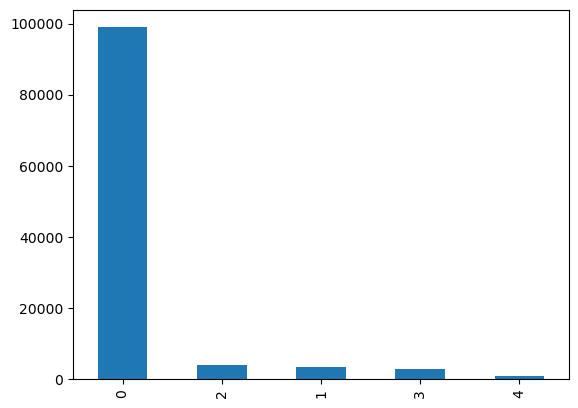

In [121]:
#Online Activity:
new.Online_Activity.value_counts().plot(kind='bar')

In [125]:
new.Online_Activity.replace(to_replace=[1,2,3,4],value=[1,1,1,1],inplace=True)

In [126]:
#Category1:
new['Category1']=pd.factorize(new.Category1)[0]
new['Category2']=pd.factorize(new.Category2)[0]

In [130]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Income,Education_Score,Age,City_Type,Employer_Category,Online_Activity,Interaction_Days,Camp_Duration,Headstart,Camp_End_Reg_Duration,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,Camp_Start_Month,Camp_End_Month,Camp_Duration_Month,Patient_Per_Day,Patient_Per_Month,Patient_Per_Year,Patient_Count_Reg_Date,Health_Camp_Count,Patient_HC_Count,Health_Camp_Month_FC,Health_Camp_Year_FC,Target
0,4,0,0,0,2,0,0,2,-1,-1,-1,-1,-1,0,278.0,59,25.0,34.0,10.0,9.0,2005.0,2005,2005,8,10,2,2649.0,6585.0,15710.0,106.0,4.0,2837,5,19,1
1,45,5,0,0,7,0,0,2,0,0,0,0,0,0,344.0,59,2.0,57.0,18.0,8.0,2005.0,2005,2005,8,10,2,3620.0,5804.0,15710.0,134.0,6.0,2837,5,19,0
2,0,0,0,0,0,1,1,2,-1,-1,-1,-1,-1,0,676.0,751,194.0,557.0,29.0,4.0,2006.0,2005,2007,10,11,1,2518.0,4785.0,19318.0,65.0,4.0,3597,8,9,1
3,0,0,0,0,0,2,2,2,-1,-1,-1,1,-1,0,0.0,17,6.0,11.0,7.0,2.0,2004.0,2004,2004,2,2,0,2363.0,5029.0,9646.0,139.0,3.0,1882,6,14,0
4,15,1,0,0,7,1,1,2,0,1,0,1,1,1,970.0,4,30.0,34.0,28.0,2.0,2006.0,2006,2006,3,4,1,3012.0,5029.0,19318.0,58.0,6.0,3823,5,18,1


## Modeling:

In [127]:
#Split the data in Train & Test:

newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [128]:
train.shape, test.shape, newtrain.shape, newtest.shape

((75278, 8), (35249, 8), (75278, 35), (35249, 35))

In [129]:
#X & y:

X=newtrain.drop('Target',axis=1)
y=newtrain.Target
newtest=newtest.drop('Target',axis=1)

In [131]:
#!pip install catboost

     -------------------------------------- 101.0/101.0 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00


In [132]:
#Importing Libraries:

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [133]:
#Make a dictionary of Models & Run them in one go:

def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['tree']=DecisionTreeClassifier(criterion='entropy')
    models['RF']=RandomForestClassifier(criterion='entropy')
    models['Adaboost']=AdaBoostClassifier()
    models['GBM']=GradientBoostingClassifier()
    models['XGB']=XGBClassifier()
    models['LGBM']=LGBMClassifier()
    models['cboost']=CatBoostClassifier()
    return models

In [134]:
#Evaluation Function:

def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    scores=cross_val_score(model,X,y,scoring='roc_auc',
                           cv=cv,error_score='raise',n_jobs=-1)
    return scores

In [135]:
#Build models & generate scores:

models=base_models()
result,names=list(),list()

for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print((name,np.mean(result)),np.std(result))

('lg', 0.6907649195270181) 0.005642925879806895
('tree', 0.704125547607654) 0.01422553775468098
('RF', 0.7528011562437057) 0.06982030587928564
('Adaboost', 0.7744856565487221) 0.07119252035638095
('GBM', 0.7900356410737049) 0.0708728869928634
('XGB', 0.8024650360071969) 0.07042138663635944
('LGBM', 0.8111919556015109) 0.06861790301960898
('cboost', 0.8182352621382851) 0.06684333689891475


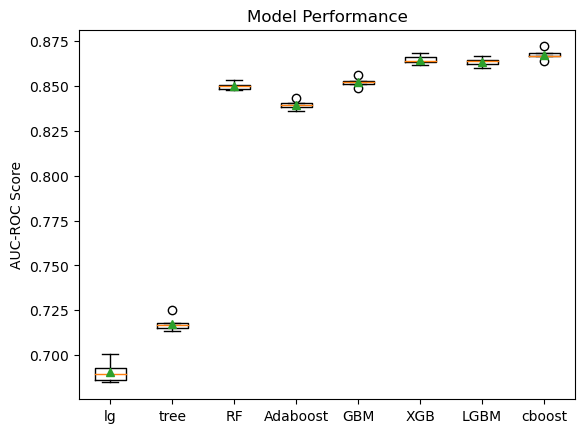

In [136]:
#Lets visualize the scores:

plt.boxplot(result,labels=names,showmeans=True)
plt.title('Model Performance')
plt.ylabel('AUC-ROC Score')
plt.show()

In [137]:
#High Performing: XGB, LGBM & Ensemble:

In [138]:
#xgboost:
xgboost=XGBClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_xgb=[]

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgboost.fit(xtrain,ytrain).predict_proba(newtest))

In [141]:
#LightGBM:
lgbm=LGBMClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_lgbm=[]

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict_proba(newtest))

In [147]:
#CatBoost:
cboost=CatBoostClassifier()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_cboost=[]

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain,ytrain).predict_proba(newtest))

Learning rate set to 0.059277
0:	learn: 0.6605531	total: 182ms	remaining: 3m 2s
1:	learn: 0.6303429	total: 209ms	remaining: 1m 44s
2:	learn: 0.6039484	total: 234ms	remaining: 1m 17s
3:	learn: 0.5813010	total: 259ms	remaining: 1m 4s
4:	learn: 0.5624060	total: 280ms	remaining: 55.7s
5:	learn: 0.5456597	total: 302ms	remaining: 50.1s
6:	learn: 0.5311531	total: 325ms	remaining: 46.2s
7:	learn: 0.5184606	total: 348ms	remaining: 43.2s
8:	learn: 0.5083494	total: 370ms	remaining: 40.8s
9:	learn: 0.4993560	total: 394ms	remaining: 39s
10:	learn: 0.4909163	total: 418ms	remaining: 37.5s
11:	learn: 0.4842242	total: 439ms	remaining: 36.2s
12:	learn: 0.4779823	total: 466ms	remaining: 35.4s
13:	learn: 0.4716809	total: 491ms	remaining: 34.6s
14:	learn: 0.4666027	total: 515ms	remaining: 33.8s
15:	learn: 0.4622899	total: 538ms	remaining: 33.1s
16:	learn: 0.4583588	total: 563ms	remaining: 32.6s
17:	learn: 0.4544755	total: 586ms	remaining: 31.9s
18:	learn: 0.4509554	total: 611ms	remaining: 31.6s
19:	learn: 

162:	learn: 0.3983506	total: 3.84s	remaining: 19.7s
163:	learn: 0.3982737	total: 3.86s	remaining: 19.7s
164:	learn: 0.3981746	total: 3.88s	remaining: 19.7s
165:	learn: 0.3981134	total: 3.91s	remaining: 19.6s
166:	learn: 0.3979424	total: 3.93s	remaining: 19.6s
167:	learn: 0.3978022	total: 3.95s	remaining: 19.6s
168:	learn: 0.3976140	total: 3.97s	remaining: 19.5s
169:	learn: 0.3975227	total: 3.99s	remaining: 19.5s
170:	learn: 0.3973153	total: 4.01s	remaining: 19.4s
171:	learn: 0.3972172	total: 4.03s	remaining: 19.4s
172:	learn: 0.3971519	total: 4.05s	remaining: 19.4s
173:	learn: 0.3970803	total: 4.07s	remaining: 19.3s
174:	learn: 0.3969642	total: 4.09s	remaining: 19.3s
175:	learn: 0.3968237	total: 4.12s	remaining: 19.3s
176:	learn: 0.3967489	total: 4.14s	remaining: 19.2s
177:	learn: 0.3967025	total: 4.16s	remaining: 19.2s
178:	learn: 0.3966279	total: 4.18s	remaining: 19.2s
179:	learn: 0.3964956	total: 4.2s	remaining: 19.1s
180:	learn: 0.3964283	total: 4.22s	remaining: 19.1s
181:	learn: 0

324:	learn: 0.3832821	total: 7.27s	remaining: 15.1s
325:	learn: 0.3832782	total: 7.29s	remaining: 15.1s
326:	learn: 0.3831905	total: 7.31s	remaining: 15s
327:	learn: 0.3830919	total: 7.33s	remaining: 15s
328:	learn: 0.3830321	total: 7.35s	remaining: 15s
329:	learn: 0.3829244	total: 7.37s	remaining: 15s
330:	learn: 0.3828377	total: 7.39s	remaining: 14.9s
331:	learn: 0.3827495	total: 7.41s	remaining: 14.9s
332:	learn: 0.3826766	total: 7.44s	remaining: 14.9s
333:	learn: 0.3825649	total: 7.46s	remaining: 14.9s
334:	learn: 0.3824809	total: 7.48s	remaining: 14.8s
335:	learn: 0.3823988	total: 7.5s	remaining: 14.8s
336:	learn: 0.3823161	total: 7.52s	remaining: 14.8s
337:	learn: 0.3822536	total: 7.54s	remaining: 14.8s
338:	learn: 0.3821456	total: 7.56s	remaining: 14.7s
339:	learn: 0.3820722	total: 7.59s	remaining: 14.7s
340:	learn: 0.3820088	total: 7.61s	remaining: 14.7s
341:	learn: 0.3819527	total: 7.63s	remaining: 14.7s
342:	learn: 0.3818195	total: 7.65s	remaining: 14.7s
343:	learn: 0.3816908

485:	learn: 0.3715337	total: 10.7s	remaining: 11.3s
486:	learn: 0.3714801	total: 10.7s	remaining: 11.3s
487:	learn: 0.3714760	total: 10.7s	remaining: 11.3s
488:	learn: 0.3714270	total: 10.7s	remaining: 11.2s
489:	learn: 0.3713323	total: 10.8s	remaining: 11.2s
490:	learn: 0.3712648	total: 10.8s	remaining: 11.2s
491:	learn: 0.3711932	total: 10.8s	remaining: 11.2s
492:	learn: 0.3711296	total: 10.8s	remaining: 11.1s
493:	learn: 0.3710529	total: 10.9s	remaining: 11.1s
494:	learn: 0.3709522	total: 10.9s	remaining: 11.1s
495:	learn: 0.3708880	total: 10.9s	remaining: 11.1s
496:	learn: 0.3708341	total: 10.9s	remaining: 11.1s
497:	learn: 0.3707713	total: 10.9s	remaining: 11s
498:	learn: 0.3706979	total: 11s	remaining: 11s
499:	learn: 0.3706240	total: 11s	remaining: 11s
500:	learn: 0.3705741	total: 11s	remaining: 11s
501:	learn: 0.3705094	total: 11s	remaining: 10.9s
502:	learn: 0.3704465	total: 11s	remaining: 10.9s
503:	learn: 0.3703996	total: 11.1s	remaining: 10.9s
504:	learn: 0.3703121	total: 1

645:	learn: 0.3617315	total: 14.1s	remaining: 7.75s
646:	learn: 0.3616643	total: 14.2s	remaining: 7.73s
647:	learn: 0.3616084	total: 14.2s	remaining: 7.71s
648:	learn: 0.3615190	total: 14.2s	remaining: 7.68s
649:	learn: 0.3614582	total: 14.2s	remaining: 7.66s
650:	learn: 0.3613941	total: 14.2s	remaining: 7.64s
651:	learn: 0.3613313	total: 14.3s	remaining: 7.62s
652:	learn: 0.3612789	total: 14.3s	remaining: 7.59s
653:	learn: 0.3611973	total: 14.3s	remaining: 7.57s
654:	learn: 0.3611413	total: 14.3s	remaining: 7.55s
655:	learn: 0.3610869	total: 14.4s	remaining: 7.53s
656:	learn: 0.3610300	total: 14.4s	remaining: 7.5s
657:	learn: 0.3609811	total: 14.4s	remaining: 7.48s
658:	learn: 0.3609113	total: 14.4s	remaining: 7.46s
659:	learn: 0.3608382	total: 14.4s	remaining: 7.44s
660:	learn: 0.3607831	total: 14.5s	remaining: 7.41s
661:	learn: 0.3607375	total: 14.5s	remaining: 7.39s
662:	learn: 0.3607011	total: 14.5s	remaining: 7.37s
663:	learn: 0.3606596	total: 14.5s	remaining: 7.35s
664:	learn: 0

808:	learn: 0.3529436	total: 17.6s	remaining: 4.15s
809:	learn: 0.3528901	total: 17.6s	remaining: 4.13s
810:	learn: 0.3528531	total: 17.6s	remaining: 4.11s
811:	learn: 0.3528073	total: 17.6s	remaining: 4.08s
812:	learn: 0.3527446	total: 17.7s	remaining: 4.06s
813:	learn: 0.3526904	total: 17.7s	remaining: 4.04s
814:	learn: 0.3526309	total: 17.7s	remaining: 4.02s
815:	learn: 0.3526065	total: 17.7s	remaining: 4s
816:	learn: 0.3525674	total: 17.7s	remaining: 3.97s
817:	learn: 0.3525062	total: 17.8s	remaining: 3.95s
818:	learn: 0.3524485	total: 17.8s	remaining: 3.93s
819:	learn: 0.3524032	total: 17.8s	remaining: 3.91s
820:	learn: 0.3523765	total: 17.8s	remaining: 3.89s
821:	learn: 0.3523153	total: 17.9s	remaining: 3.87s
822:	learn: 0.3522751	total: 17.9s	remaining: 3.84s
823:	learn: 0.3522211	total: 17.9s	remaining: 3.82s
824:	learn: 0.3521718	total: 17.9s	remaining: 3.8s
825:	learn: 0.3521076	total: 17.9s	remaining: 3.78s
826:	learn: 0.3520564	total: 18s	remaining: 3.76s
827:	learn: 0.3519

976:	learn: 0.3452320	total: 21.2s	remaining: 498ms
977:	learn: 0.3451894	total: 21.2s	remaining: 477ms
978:	learn: 0.3451511	total: 21.2s	remaining: 455ms
979:	learn: 0.3451096	total: 21.2s	remaining: 433ms
980:	learn: 0.3450707	total: 21.2s	remaining: 412ms
981:	learn: 0.3450325	total: 21.3s	remaining: 390ms
982:	learn: 0.3449713	total: 21.3s	remaining: 368ms
983:	learn: 0.3449114	total: 21.3s	remaining: 347ms
984:	learn: 0.3448386	total: 21.3s	remaining: 325ms
985:	learn: 0.3447900	total: 21.4s	remaining: 303ms
986:	learn: 0.3447411	total: 21.4s	remaining: 282ms
987:	learn: 0.3446991	total: 21.4s	remaining: 260ms
988:	learn: 0.3446591	total: 21.4s	remaining: 238ms
989:	learn: 0.3446038	total: 21.4s	remaining: 217ms
990:	learn: 0.3445481	total: 21.5s	remaining: 195ms
991:	learn: 0.3444789	total: 21.5s	remaining: 173ms
992:	learn: 0.3444426	total: 21.5s	remaining: 152ms
993:	learn: 0.3443901	total: 21.5s	remaining: 130ms
994:	learn: 0.3443377	total: 21.5s	remaining: 108ms
995:	learn: 

140:	learn: 0.4005222	total: 3.21s	remaining: 19.6s
141:	learn: 0.4003909	total: 3.23s	remaining: 19.5s
142:	learn: 0.4002675	total: 3.25s	remaining: 19.5s
143:	learn: 0.4001621	total: 3.28s	remaining: 19.5s
144:	learn: 0.4000354	total: 3.3s	remaining: 19.5s
145:	learn: 0.3999592	total: 3.32s	remaining: 19.4s
146:	learn: 0.3998143	total: 3.35s	remaining: 19.4s
147:	learn: 0.3996451	total: 3.38s	remaining: 19.4s
148:	learn: 0.3995927	total: 3.4s	remaining: 19.4s
149:	learn: 0.3995384	total: 3.42s	remaining: 19.4s
150:	learn: 0.3994149	total: 3.44s	remaining: 19.3s
151:	learn: 0.3992786	total: 3.46s	remaining: 19.3s
152:	learn: 0.3991682	total: 3.49s	remaining: 19.3s
153:	learn: 0.3990552	total: 3.51s	remaining: 19.3s
154:	learn: 0.3989775	total: 3.54s	remaining: 19.3s
155:	learn: 0.3988475	total: 3.56s	remaining: 19.3s
156:	learn: 0.3987343	total: 3.59s	remaining: 19.3s
157:	learn: 0.3985931	total: 3.61s	remaining: 19.3s
158:	learn: 0.3984916	total: 3.64s	remaining: 19.2s
159:	learn: 0.

299:	learn: 0.3850834	total: 6.9s	remaining: 16.1s
300:	learn: 0.3850007	total: 6.92s	remaining: 16.1s
301:	learn: 0.3849163	total: 6.95s	remaining: 16.1s
302:	learn: 0.3848675	total: 6.97s	remaining: 16s
303:	learn: 0.3848262	total: 6.99s	remaining: 16s
304:	learn: 0.3847797	total: 7.01s	remaining: 16s
305:	learn: 0.3846804	total: 7.04s	remaining: 16s
306:	learn: 0.3845733	total: 7.06s	remaining: 15.9s
307:	learn: 0.3845389	total: 7.08s	remaining: 15.9s
308:	learn: 0.3844614	total: 7.11s	remaining: 15.9s
309:	learn: 0.3843736	total: 7.13s	remaining: 15.9s
310:	learn: 0.3842689	total: 7.16s	remaining: 15.9s
311:	learn: 0.3841951	total: 7.18s	remaining: 15.8s
312:	learn: 0.3841339	total: 7.21s	remaining: 15.8s
313:	learn: 0.3840679	total: 7.23s	remaining: 15.8s
314:	learn: 0.3839893	total: 7.25s	remaining: 15.8s
315:	learn: 0.3839058	total: 7.28s	remaining: 15.8s
316:	learn: 0.3837865	total: 7.3s	remaining: 15.7s
317:	learn: 0.3837111	total: 7.33s	remaining: 15.7s
318:	learn: 0.3836205	

458:	learn: 0.3734097	total: 10.6s	remaining: 12.5s
459:	learn: 0.3733734	total: 10.6s	remaining: 12.5s
460:	learn: 0.3733162	total: 10.7s	remaining: 12.5s
461:	learn: 0.3732601	total: 10.7s	remaining: 12.4s
462:	learn: 0.3731990	total: 10.7s	remaining: 12.4s
463:	learn: 0.3731319	total: 10.7s	remaining: 12.4s
464:	learn: 0.3730539	total: 10.7s	remaining: 12.4s
465:	learn: 0.3730006	total: 10.8s	remaining: 12.3s
466:	learn: 0.3729557	total: 10.8s	remaining: 12.3s
467:	learn: 0.3729007	total: 10.8s	remaining: 12.3s
468:	learn: 0.3728394	total: 10.8s	remaining: 12.3s
469:	learn: 0.3727906	total: 10.9s	remaining: 12.3s
470:	learn: 0.3727237	total: 10.9s	remaining: 12.2s
471:	learn: 0.3726864	total: 10.9s	remaining: 12.2s
472:	learn: 0.3726273	total: 10.9s	remaining: 12.2s
473:	learn: 0.3725922	total: 11s	remaining: 12.2s
474:	learn: 0.3725331	total: 11s	remaining: 12.1s
475:	learn: 0.3724779	total: 11s	remaining: 12.1s
476:	learn: 0.3724212	total: 11s	remaining: 12.1s
477:	learn: 0.372325

624:	learn: 0.3636336	total: 14.5s	remaining: 8.67s
625:	learn: 0.3635627	total: 14.5s	remaining: 8.65s
626:	learn: 0.3634856	total: 14.5s	remaining: 8.63s
627:	learn: 0.3634158	total: 14.5s	remaining: 8.6s
628:	learn: 0.3633569	total: 14.5s	remaining: 8.58s
629:	learn: 0.3632993	total: 14.6s	remaining: 8.56s
630:	learn: 0.3632351	total: 14.6s	remaining: 8.54s
631:	learn: 0.3631925	total: 14.6s	remaining: 8.51s
632:	learn: 0.3631189	total: 14.6s	remaining: 8.49s
633:	learn: 0.3630635	total: 14.7s	remaining: 8.47s
634:	learn: 0.3630077	total: 14.7s	remaining: 8.44s
635:	learn: 0.3629512	total: 14.7s	remaining: 8.42s
636:	learn: 0.3628887	total: 14.7s	remaining: 8.4s
637:	learn: 0.3628371	total: 14.8s	remaining: 8.37s
638:	learn: 0.3627917	total: 14.8s	remaining: 8.35s
639:	learn: 0.3627389	total: 14.8s	remaining: 8.33s
640:	learn: 0.3626952	total: 14.8s	remaining: 8.3s
641:	learn: 0.3626245	total: 14.9s	remaining: 8.28s
642:	learn: 0.3625589	total: 14.9s	remaining: 8.26s
643:	learn: 0.3

783:	learn: 0.3552347	total: 18.1s	remaining: 4.98s
784:	learn: 0.3551907	total: 18.1s	remaining: 4.96s
785:	learn: 0.3551059	total: 18.1s	remaining: 4.94s
786:	learn: 0.3550264	total: 18.2s	remaining: 4.92s
787:	learn: 0.3549642	total: 18.2s	remaining: 4.89s
788:	learn: 0.3549198	total: 18.2s	remaining: 4.87s
789:	learn: 0.3548785	total: 18.2s	remaining: 4.85s
790:	learn: 0.3548024	total: 18.3s	remaining: 4.82s
791:	learn: 0.3547683	total: 18.3s	remaining: 4.8s
792:	learn: 0.3547241	total: 18.3s	remaining: 4.78s
793:	learn: 0.3546987	total: 18.3s	remaining: 4.75s
794:	learn: 0.3546511	total: 18.3s	remaining: 4.73s
795:	learn: 0.3545989	total: 18.4s	remaining: 4.71s
796:	learn: 0.3545509	total: 18.4s	remaining: 4.68s
797:	learn: 0.3545333	total: 18.4s	remaining: 4.66s
798:	learn: 0.3544885	total: 18.4s	remaining: 4.64s
799:	learn: 0.3544546	total: 18.5s	remaining: 4.62s
800:	learn: 0.3544019	total: 18.5s	remaining: 4.59s
801:	learn: 0.3543548	total: 18.5s	remaining: 4.57s
802:	learn: 0

943:	learn: 0.3475315	total: 21.7s	remaining: 1.29s
944:	learn: 0.3475076	total: 21.8s	remaining: 1.27s
945:	learn: 0.3474550	total: 21.8s	remaining: 1.24s
946:	learn: 0.3474000	total: 21.8s	remaining: 1.22s
947:	learn: 0.3473579	total: 21.8s	remaining: 1.2s
948:	learn: 0.3473380	total: 21.9s	remaining: 1.17s
949:	learn: 0.3472754	total: 21.9s	remaining: 1.15s
950:	learn: 0.3472375	total: 21.9s	remaining: 1.13s
951:	learn: 0.3471815	total: 21.9s	remaining: 1.1s
952:	learn: 0.3471414	total: 21.9s	remaining: 1.08s
953:	learn: 0.3471040	total: 22s	remaining: 1.06s
954:	learn: 0.3470683	total: 22s	remaining: 1.04s
955:	learn: 0.3470059	total: 22s	remaining: 1.01s
956:	learn: 0.3469458	total: 22s	remaining: 990ms
957:	learn: 0.3468876	total: 22.1s	remaining: 967ms
958:	learn: 0.3468478	total: 22.1s	remaining: 944ms
959:	learn: 0.3468184	total: 22.1s	remaining: 921ms
960:	learn: 0.3467971	total: 22.1s	remaining: 898ms
961:	learn: 0.3467600	total: 22.2s	remaining: 875ms
962:	learn: 0.3467510	

107:	learn: 0.4058745	total: 2.62s	remaining: 21.6s
108:	learn: 0.4057535	total: 2.64s	remaining: 21.6s
109:	learn: 0.4055339	total: 2.67s	remaining: 21.6s
110:	learn: 0.4053659	total: 2.69s	remaining: 21.6s
111:	learn: 0.4052737	total: 2.72s	remaining: 21.6s
112:	learn: 0.4051519	total: 2.74s	remaining: 21.5s
113:	learn: 0.4049668	total: 2.77s	remaining: 21.5s
114:	learn: 0.4048716	total: 2.79s	remaining: 21.4s
115:	learn: 0.4046204	total: 2.81s	remaining: 21.4s
116:	learn: 0.4044604	total: 2.83s	remaining: 21.4s
117:	learn: 0.4043386	total: 2.85s	remaining: 21.3s
118:	learn: 0.4042499	total: 2.88s	remaining: 21.3s
119:	learn: 0.4041224	total: 2.9s	remaining: 21.3s
120:	learn: 0.4039994	total: 2.92s	remaining: 21.2s
121:	learn: 0.4038968	total: 2.94s	remaining: 21.2s
122:	learn: 0.4037929	total: 2.97s	remaining: 21.2s
123:	learn: 0.4037133	total: 2.99s	remaining: 21.1s
124:	learn: 0.4035958	total: 3.01s	remaining: 21.1s
125:	learn: 0.4034687	total: 3.04s	remaining: 21.1s
126:	learn: 0

271:	learn: 0.3889888	total: 6.44s	remaining: 17.2s
272:	learn: 0.3889007	total: 6.46s	remaining: 17.2s
273:	learn: 0.3888319	total: 6.48s	remaining: 17.2s
274:	learn: 0.3887465	total: 6.5s	remaining: 17.1s
275:	learn: 0.3886899	total: 6.53s	remaining: 17.1s
276:	learn: 0.3886479	total: 6.55s	remaining: 17.1s
277:	learn: 0.3885519	total: 6.57s	remaining: 17.1s
278:	learn: 0.3884225	total: 6.59s	remaining: 17s
279:	learn: 0.3883643	total: 6.61s	remaining: 17s
280:	learn: 0.3883188	total: 6.64s	remaining: 17s
281:	learn: 0.3882366	total: 6.66s	remaining: 16.9s
282:	learn: 0.3880712	total: 6.68s	remaining: 16.9s
283:	learn: 0.3879565	total: 6.71s	remaining: 16.9s
284:	learn: 0.3878428	total: 6.73s	remaining: 16.9s
285:	learn: 0.3877727	total: 6.75s	remaining: 16.9s
286:	learn: 0.3876871	total: 6.78s	remaining: 16.8s
287:	learn: 0.3875955	total: 6.8s	remaining: 16.8s
288:	learn: 0.3874943	total: 6.83s	remaining: 16.8s
289:	learn: 0.3874078	total: 6.85s	remaining: 16.8s
290:	learn: 0.387302

438:	learn: 0.3764014	total: 10.4s	remaining: 13.2s
439:	learn: 0.3763128	total: 10.4s	remaining: 13.2s
440:	learn: 0.3762263	total: 10.4s	remaining: 13.2s
441:	learn: 0.3761741	total: 10.4s	remaining: 13.2s
442:	learn: 0.3761287	total: 10.4s	remaining: 13.1s
443:	learn: 0.3760733	total: 10.5s	remaining: 13.1s
444:	learn: 0.3759797	total: 10.5s	remaining: 13.1s
445:	learn: 0.3758596	total: 10.5s	remaining: 13s
446:	learn: 0.3757686	total: 10.5s	remaining: 13s
447:	learn: 0.3756924	total: 10.5s	remaining: 13s
448:	learn: 0.3756381	total: 10.6s	remaining: 13s
449:	learn: 0.3755457	total: 10.6s	remaining: 12.9s
450:	learn: 0.3754774	total: 10.6s	remaining: 12.9s
451:	learn: 0.3754199	total: 10.6s	remaining: 12.9s
452:	learn: 0.3753630	total: 10.7s	remaining: 12.9s
453:	learn: 0.3752930	total: 10.7s	remaining: 12.8s
454:	learn: 0.3752114	total: 10.7s	remaining: 12.8s
455:	learn: 0.3751615	total: 10.7s	remaining: 12.8s
456:	learn: 0.3750762	total: 10.8s	remaining: 12.8s
457:	learn: 0.375028

598:	learn: 0.3660604	total: 14s	remaining: 9.4s
599:	learn: 0.3660290	total: 14.1s	remaining: 9.37s
600:	learn: 0.3659683	total: 14.1s	remaining: 9.35s
601:	learn: 0.3659346	total: 14.1s	remaining: 9.33s
602:	learn: 0.3658187	total: 14.1s	remaining: 9.3s
603:	learn: 0.3657569	total: 14.2s	remaining: 9.28s
604:	learn: 0.3657048	total: 14.2s	remaining: 9.26s
605:	learn: 0.3656592	total: 14.2s	remaining: 9.24s
606:	learn: 0.3655916	total: 14.2s	remaining: 9.21s
607:	learn: 0.3655194	total: 14.3s	remaining: 9.19s
608:	learn: 0.3654566	total: 14.3s	remaining: 9.17s
609:	learn: 0.3654005	total: 14.3s	remaining: 9.14s
610:	learn: 0.3653586	total: 14.3s	remaining: 9.12s
611:	learn: 0.3653170	total: 14.3s	remaining: 9.1s
612:	learn: 0.3652532	total: 14.4s	remaining: 9.08s
613:	learn: 0.3651897	total: 14.4s	remaining: 9.05s
614:	learn: 0.3651168	total: 14.4s	remaining: 9.03s
615:	learn: 0.3650330	total: 14.4s	remaining: 9s
616:	learn: 0.3649855	total: 14.5s	remaining: 8.98s
617:	learn: 0.364933

760:	learn: 0.3572666	total: 17.8s	remaining: 5.57s
761:	learn: 0.3572227	total: 17.8s	remaining: 5.55s
762:	learn: 0.3571867	total: 17.8s	remaining: 5.53s
763:	learn: 0.3571272	total: 17.8s	remaining: 5.5s
764:	learn: 0.3570851	total: 17.8s	remaining: 5.48s
765:	learn: 0.3570339	total: 17.9s	remaining: 5.46s
766:	learn: 0.3569518	total: 17.9s	remaining: 5.43s
767:	learn: 0.3569025	total: 17.9s	remaining: 5.41s
768:	learn: 0.3568428	total: 17.9s	remaining: 5.39s
769:	learn: 0.3568221	total: 18s	remaining: 5.37s
770:	learn: 0.3567882	total: 18s	remaining: 5.34s
771:	learn: 0.3567550	total: 18s	remaining: 5.32s
772:	learn: 0.3566988	total: 18s	remaining: 5.29s
773:	learn: 0.3566598	total: 18.1s	remaining: 5.27s
774:	learn: 0.3566070	total: 18.1s	remaining: 5.25s
775:	learn: 0.3565571	total: 18.1s	remaining: 5.22s
776:	learn: 0.3565312	total: 18.1s	remaining: 5.2s
777:	learn: 0.3564659	total: 18.1s	remaining: 5.18s
778:	learn: 0.3563952	total: 18.2s	remaining: 5.15s
779:	learn: 0.3563583	

919:	learn: 0.3494344	total: 21.4s	remaining: 1.86s
920:	learn: 0.3493834	total: 21.4s	remaining: 1.84s
921:	learn: 0.3493529	total: 21.5s	remaining: 1.82s
922:	learn: 0.3492914	total: 21.5s	remaining: 1.79s
923:	learn: 0.3492376	total: 21.5s	remaining: 1.77s
924:	learn: 0.3492065	total: 21.5s	remaining: 1.75s
925:	learn: 0.3491461	total: 21.6s	remaining: 1.72s
926:	learn: 0.3491304	total: 21.6s	remaining: 1.7s
927:	learn: 0.3490971	total: 21.6s	remaining: 1.68s
928:	learn: 0.3490478	total: 21.6s	remaining: 1.65s
929:	learn: 0.3490134	total: 21.7s	remaining: 1.63s
930:	learn: 0.3489726	total: 21.7s	remaining: 1.61s
931:	learn: 0.3489400	total: 21.7s	remaining: 1.58s
932:	learn: 0.3488767	total: 21.7s	remaining: 1.56s
933:	learn: 0.3488161	total: 21.8s	remaining: 1.54s
934:	learn: 0.3487859	total: 21.8s	remaining: 1.51s
935:	learn: 0.3487329	total: 21.8s	remaining: 1.49s
936:	learn: 0.3486738	total: 21.8s	remaining: 1.47s
937:	learn: 0.3486157	total: 21.8s	remaining: 1.44s
938:	learn: 0

80:	learn: 0.4084620	total: 1.93s	remaining: 21.9s
81:	learn: 0.4082601	total: 1.95s	remaining: 21.9s
82:	learn: 0.4079994	total: 1.98s	remaining: 21.8s
83:	learn: 0.4077461	total: 2s	remaining: 21.8s
84:	learn: 0.4076050	total: 2.02s	remaining: 21.7s
85:	learn: 0.4075181	total: 2.04s	remaining: 21.7s
86:	learn: 0.4073341	total: 2.07s	remaining: 21.7s
87:	learn: 0.4072057	total: 2.09s	remaining: 21.7s
88:	learn: 0.4069277	total: 2.12s	remaining: 21.7s
89:	learn: 0.4067504	total: 2.14s	remaining: 21.6s
90:	learn: 0.4065393	total: 2.16s	remaining: 21.6s
91:	learn: 0.4063789	total: 2.19s	remaining: 21.6s
92:	learn: 0.4062367	total: 2.21s	remaining: 21.6s
93:	learn: 0.4060395	total: 2.23s	remaining: 21.5s
94:	learn: 0.4058471	total: 2.26s	remaining: 21.5s
95:	learn: 0.4056752	total: 2.28s	remaining: 21.5s
96:	learn: 0.4055279	total: 2.31s	remaining: 21.5s
97:	learn: 0.4054192	total: 2.33s	remaining: 21.4s
98:	learn: 0.4053007	total: 2.35s	remaining: 21.4s
99:	learn: 0.4052243	total: 2.38s	

245:	learn: 0.3896782	total: 5.75s	remaining: 17.6s
246:	learn: 0.3895808	total: 5.77s	remaining: 17.6s
247:	learn: 0.3894672	total: 5.79s	remaining: 17.6s
248:	learn: 0.3894312	total: 5.81s	remaining: 17.5s
249:	learn: 0.3893386	total: 5.83s	remaining: 17.5s
250:	learn: 0.3892435	total: 5.85s	remaining: 17.5s
251:	learn: 0.3891890	total: 5.88s	remaining: 17.4s
252:	learn: 0.3890885	total: 5.9s	remaining: 17.4s
253:	learn: 0.3890411	total: 5.92s	remaining: 17.4s
254:	learn: 0.3889228	total: 5.95s	remaining: 17.4s
255:	learn: 0.3888183	total: 5.97s	remaining: 17.4s
256:	learn: 0.3886907	total: 6s	remaining: 17.3s
257:	learn: 0.3885565	total: 6.02s	remaining: 17.3s
258:	learn: 0.3884906	total: 6.04s	remaining: 17.3s
259:	learn: 0.3883793	total: 6.07s	remaining: 17.3s
260:	learn: 0.3883040	total: 6.09s	remaining: 17.2s
261:	learn: 0.3882451	total: 6.11s	remaining: 17.2s
262:	learn: 0.3881630	total: 6.13s	remaining: 17.2s
263:	learn: 0.3880997	total: 6.15s	remaining: 17.2s
264:	learn: 0.38

410:	learn: 0.3764479	total: 9.58s	remaining: 13.7s
411:	learn: 0.3763891	total: 9.6s	remaining: 13.7s
412:	learn: 0.3762876	total: 9.63s	remaining: 13.7s
413:	learn: 0.3762054	total: 9.65s	remaining: 13.7s
414:	learn: 0.3761473	total: 9.67s	remaining: 13.6s
415:	learn: 0.3760486	total: 9.7s	remaining: 13.6s
416:	learn: 0.3759712	total: 9.71s	remaining: 13.6s
417:	learn: 0.3759457	total: 9.73s	remaining: 13.6s
418:	learn: 0.3759233	total: 9.76s	remaining: 13.5s
419:	learn: 0.3758522	total: 9.78s	remaining: 13.5s
420:	learn: 0.3757279	total: 9.8s	remaining: 13.5s
421:	learn: 0.3756448	total: 9.82s	remaining: 13.5s
422:	learn: 0.3755640	total: 9.85s	remaining: 13.4s
423:	learn: 0.3754576	total: 9.87s	remaining: 13.4s
424:	learn: 0.3753929	total: 9.89s	remaining: 13.4s
425:	learn: 0.3753206	total: 9.92s	remaining: 13.4s
426:	learn: 0.3752077	total: 9.94s	remaining: 13.3s
427:	learn: 0.3751302	total: 9.96s	remaining: 13.3s
428:	learn: 0.3750834	total: 9.99s	remaining: 13.3s
429:	learn: 0.3

577:	learn: 0.3653261	total: 13.4s	remaining: 9.81s
578:	learn: 0.3652429	total: 13.5s	remaining: 9.79s
579:	learn: 0.3651890	total: 13.5s	remaining: 9.76s
580:	learn: 0.3651460	total: 13.5s	remaining: 9.74s
581:	learn: 0.3650797	total: 13.5s	remaining: 9.72s
582:	learn: 0.3650425	total: 13.5s	remaining: 9.69s
583:	learn: 0.3649794	total: 13.6s	remaining: 9.67s
584:	learn: 0.3648794	total: 13.6s	remaining: 9.64s
585:	learn: 0.3648147	total: 13.6s	remaining: 9.62s
586:	learn: 0.3647530	total: 13.6s	remaining: 9.6s
587:	learn: 0.3646761	total: 13.7s	remaining: 9.57s
588:	learn: 0.3646110	total: 13.7s	remaining: 9.55s
589:	learn: 0.3645428	total: 13.7s	remaining: 9.53s
590:	learn: 0.3644598	total: 13.7s	remaining: 9.51s
591:	learn: 0.3644000	total: 13.8s	remaining: 9.48s
592:	learn: 0.3643450	total: 13.8s	remaining: 9.46s
593:	learn: 0.3642838	total: 13.8s	remaining: 9.43s
594:	learn: 0.3642090	total: 13.8s	remaining: 9.41s
595:	learn: 0.3641687	total: 13.8s	remaining: 9.39s
596:	learn: 0

738:	learn: 0.3560982	total: 17.1s	remaining: 6.04s
739:	learn: 0.3560458	total: 17.1s	remaining: 6.02s
740:	learn: 0.3560163	total: 17.2s	remaining: 6s
741:	learn: 0.3559593	total: 17.2s	remaining: 5.97s
742:	learn: 0.3558833	total: 17.2s	remaining: 5.95s
743:	learn: 0.3558319	total: 17.2s	remaining: 5.93s
744:	learn: 0.3557807	total: 17.2s	remaining: 5.9s
745:	learn: 0.3557093	total: 17.3s	remaining: 5.88s
746:	learn: 0.3556689	total: 17.3s	remaining: 5.86s
747:	learn: 0.3556035	total: 17.3s	remaining: 5.83s
748:	learn: 0.3555522	total: 17.3s	remaining: 5.81s
749:	learn: 0.3555202	total: 17.4s	remaining: 5.79s
750:	learn: 0.3554865	total: 17.4s	remaining: 5.76s
751:	learn: 0.3554222	total: 17.4s	remaining: 5.74s
752:	learn: 0.3553845	total: 17.4s	remaining: 5.72s
753:	learn: 0.3553047	total: 17.5s	remaining: 5.69s
754:	learn: 0.3552554	total: 17.5s	remaining: 5.67s
755:	learn: 0.3552049	total: 17.5s	remaining: 5.65s
756:	learn: 0.3551469	total: 17.5s	remaining: 5.63s
757:	learn: 0.35

902:	learn: 0.3478059	total: 20.9s	remaining: 2.25s
903:	learn: 0.3477585	total: 21s	remaining: 2.23s
904:	learn: 0.3477113	total: 21s	remaining: 2.2s
905:	learn: 0.3476458	total: 21s	remaining: 2.18s
906:	learn: 0.3475786	total: 21s	remaining: 2.16s
907:	learn: 0.3475313	total: 21.1s	remaining: 2.13s
908:	learn: 0.3474864	total: 21.1s	remaining: 2.11s
909:	learn: 0.3474311	total: 21.1s	remaining: 2.09s
910:	learn: 0.3473628	total: 21.1s	remaining: 2.06s
911:	learn: 0.3473225	total: 21.2s	remaining: 2.04s
912:	learn: 0.3472879	total: 21.2s	remaining: 2.02s
913:	learn: 0.3472324	total: 21.2s	remaining: 1.99s
914:	learn: 0.3471922	total: 21.2s	remaining: 1.97s
915:	learn: 0.3471585	total: 21.2s	remaining: 1.95s
916:	learn: 0.3470883	total: 21.3s	remaining: 1.92s
917:	learn: 0.3470631	total: 21.3s	remaining: 1.9s
918:	learn: 0.3470098	total: 21.3s	remaining: 1.88s
919:	learn: 0.3469553	total: 21.3s	remaining: 1.85s
920:	learn: 0.3469166	total: 21.4s	remaining: 1.83s
921:	learn: 0.3468656	

63:	learn: 0.4114140	total: 1.52s	remaining: 22.3s
64:	learn: 0.4111540	total: 1.55s	remaining: 22.3s
65:	learn: 0.4109665	total: 1.57s	remaining: 22.3s
66:	learn: 0.4106148	total: 1.6s	remaining: 22.3s
67:	learn: 0.4104680	total: 1.62s	remaining: 22.2s
68:	learn: 0.4103267	total: 1.64s	remaining: 22.2s
69:	learn: 0.4101853	total: 1.67s	remaining: 22.2s
70:	learn: 0.4099888	total: 1.69s	remaining: 22.1s
71:	learn: 0.4098197	total: 1.71s	remaining: 22.1s
72:	learn: 0.4094803	total: 1.74s	remaining: 22.1s
73:	learn: 0.4091913	total: 1.76s	remaining: 22.1s
74:	learn: 0.4090294	total: 1.79s	remaining: 22.1s
75:	learn: 0.4088232	total: 1.81s	remaining: 22s
76:	learn: 0.4086636	total: 1.83s	remaining: 22s
77:	learn: 0.4085448	total: 1.86s	remaining: 22s
78:	learn: 0.4083011	total: 1.88s	remaining: 22s
79:	learn: 0.4081148	total: 1.91s	remaining: 21.9s
80:	learn: 0.4078370	total: 1.93s	remaining: 21.9s
81:	learn: 0.4076885	total: 1.95s	remaining: 21.8s
82:	learn: 0.4075413	total: 1.97s	remain

230:	learn: 0.3893561	total: 5.4s	remaining: 18s
231:	learn: 0.3893045	total: 5.42s	remaining: 17.9s
232:	learn: 0.3892193	total: 5.44s	remaining: 17.9s
233:	learn: 0.3891615	total: 5.46s	remaining: 17.9s
234:	learn: 0.3890307	total: 5.49s	remaining: 17.9s
235:	learn: 0.3888867	total: 5.51s	remaining: 17.8s
236:	learn: 0.3887737	total: 5.54s	remaining: 17.8s
237:	learn: 0.3886703	total: 5.55s	remaining: 17.8s
238:	learn: 0.3885366	total: 5.58s	remaining: 17.8s
239:	learn: 0.3884203	total: 5.6s	remaining: 17.7s
240:	learn: 0.3883415	total: 5.63s	remaining: 17.7s
241:	learn: 0.3882320	total: 5.65s	remaining: 17.7s
242:	learn: 0.3881503	total: 5.67s	remaining: 17.7s
243:	learn: 0.3879833	total: 5.7s	remaining: 17.7s
244:	learn: 0.3879174	total: 5.74s	remaining: 17.7s
245:	learn: 0.3878513	total: 5.76s	remaining: 17.7s
246:	learn: 0.3877387	total: 5.79s	remaining: 17.6s
247:	learn: 0.3876368	total: 5.81s	remaining: 17.6s
248:	learn: 0.3875328	total: 5.83s	remaining: 17.6s
249:	learn: 0.387

395:	learn: 0.3758817	total: 9.22s	remaining: 14.1s
396:	learn: 0.3758224	total: 9.24s	remaining: 14s
397:	learn: 0.3757514	total: 9.26s	remaining: 14s
398:	learn: 0.3756785	total: 9.29s	remaining: 14s
399:	learn: 0.3756240	total: 9.31s	remaining: 14s
400:	learn: 0.3755847	total: 9.33s	remaining: 13.9s
401:	learn: 0.3755097	total: 9.35s	remaining: 13.9s
402:	learn: 0.3754071	total: 9.38s	remaining: 13.9s
403:	learn: 0.3753512	total: 9.4s	remaining: 13.9s
404:	learn: 0.3752815	total: 9.42s	remaining: 13.8s
405:	learn: 0.3751896	total: 9.44s	remaining: 13.8s
406:	learn: 0.3751175	total: 9.47s	remaining: 13.8s
407:	learn: 0.3750704	total: 9.49s	remaining: 13.8s
408:	learn: 0.3749692	total: 9.51s	remaining: 13.7s
409:	learn: 0.3748520	total: 9.54s	remaining: 13.7s
410:	learn: 0.3747889	total: 9.56s	remaining: 13.7s
411:	learn: 0.3747318	total: 9.59s	remaining: 13.7s
412:	learn: 0.3746597	total: 9.61s	remaining: 13.7s
413:	learn: 0.3745993	total: 9.63s	remaining: 13.6s
414:	learn: 0.3745511

561:	learn: 0.3646934	total: 13s	remaining: 10.2s
562:	learn: 0.3646282	total: 13.1s	remaining: 10.1s
563:	learn: 0.3645583	total: 13.1s	remaining: 10.1s
564:	learn: 0.3645030	total: 13.1s	remaining: 10.1s
565:	learn: 0.3644438	total: 13.1s	remaining: 10.1s
566:	learn: 0.3643948	total: 13.2s	remaining: 10s
567:	learn: 0.3643289	total: 13.2s	remaining: 10s
568:	learn: 0.3642629	total: 13.2s	remaining: 10s
569:	learn: 0.3641976	total: 13.2s	remaining: 9.98s
570:	learn: 0.3641580	total: 13.3s	remaining: 9.96s
571:	learn: 0.3640835	total: 13.3s	remaining: 9.93s
572:	learn: 0.3639934	total: 13.3s	remaining: 9.9s
573:	learn: 0.3639577	total: 13.3s	remaining: 9.88s
574:	learn: 0.3638803	total: 13.3s	remaining: 9.86s
575:	learn: 0.3638379	total: 13.4s	remaining: 9.84s
576:	learn: 0.3637730	total: 13.4s	remaining: 9.81s
577:	learn: 0.3636945	total: 13.4s	remaining: 9.79s
578:	learn: 0.3636213	total: 13.4s	remaining: 9.77s
579:	learn: 0.3635588	total: 13.5s	remaining: 9.74s
580:	learn: 0.3635255

728:	learn: 0.3552627	total: 16.9s	remaining: 6.28s
729:	learn: 0.3552081	total: 16.9s	remaining: 6.26s
730:	learn: 0.3551872	total: 16.9s	remaining: 6.23s
731:	learn: 0.3551340	total: 17s	remaining: 6.21s
732:	learn: 0.3550953	total: 17s	remaining: 6.19s
733:	learn: 0.3550257	total: 17s	remaining: 6.16s
734:	learn: 0.3549667	total: 17s	remaining: 6.14s
735:	learn: 0.3549336	total: 17.1s	remaining: 6.12s
736:	learn: 0.3548852	total: 17.1s	remaining: 6.09s
737:	learn: 0.3548357	total: 17.1s	remaining: 6.07s
738:	learn: 0.3548033	total: 17.1s	remaining: 6.05s
739:	learn: 0.3547293	total: 17.1s	remaining: 6.02s
740:	learn: 0.3546681	total: 17.2s	remaining: 6s
741:	learn: 0.3545959	total: 17.2s	remaining: 5.98s
742:	learn: 0.3545604	total: 17.2s	remaining: 5.95s
743:	learn: 0.3545089	total: 17.2s	remaining: 5.93s
744:	learn: 0.3544999	total: 17.3s	remaining: 5.91s
745:	learn: 0.3544625	total: 17.3s	remaining: 5.88s
746:	learn: 0.3543933	total: 17.3s	remaining: 5.86s
747:	learn: 0.3543509	t

894:	learn: 0.3472555	total: 20.7s	remaining: 2.43s
895:	learn: 0.3472265	total: 20.8s	remaining: 2.41s
896:	learn: 0.3471950	total: 20.8s	remaining: 2.39s
897:	learn: 0.3471470	total: 20.8s	remaining: 2.36s
898:	learn: 0.3470979	total: 20.8s	remaining: 2.34s
899:	learn: 0.3470608	total: 20.9s	remaining: 2.32s
900:	learn: 0.3470344	total: 20.9s	remaining: 2.29s
901:	learn: 0.3469886	total: 20.9s	remaining: 2.27s
902:	learn: 0.3469246	total: 20.9s	remaining: 2.25s
903:	learn: 0.3468742	total: 21s	remaining: 2.23s
904:	learn: 0.3468560	total: 21s	remaining: 2.2s
905:	learn: 0.3468223	total: 21s	remaining: 2.18s
906:	learn: 0.3467523	total: 21s	remaining: 2.15s
907:	learn: 0.3467223	total: 21s	remaining: 2.13s
908:	learn: 0.3466973	total: 21.1s	remaining: 2.11s
909:	learn: 0.3466300	total: 21.1s	remaining: 2.08s
910:	learn: 0.3465834	total: 21.1s	remaining: 2.06s
911:	learn: 0.3465161	total: 21.1s	remaining: 2.04s
912:	learn: 0.3464628	total: 21.2s	remaining: 2.02s
913:	learn: 0.3464421	t

In [144]:
one = pd.DataFrame(np.array(pred_xgb)[0])[1]
two = pd.DataFrame(np.array(pred_xgb)[1])[1]
third = pd.DataFrame(np.array(pred_xgb)[2])[1]
four = pd.DataFrame(np.array(pred_xgb)[3])[1]
five = pd.DataFrame(np.array(pred_xgb)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [145]:
#Submissions:

#XGBoost
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [146]:
submission.to_csv('XGB_Health.csv',index=False)
#0.713

In [148]:
one = pd.DataFrame(np.array(pred_lgbm)[0])[1]
two = pd.DataFrame(np.array(pred_lgbm)[1])[1]
third = pd.DataFrame(np.array(pred_lgbm)[2])[1]
four = pd.DataFrame(np.array(pred_lgbm)[3])[1]
five = pd.DataFrame(np.array(pred_lgbm)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [149]:
#Submissions:

#LGBM
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [150]:
submission.to_csv('LGBM_Health.csv',index=False)
#0.72753

In [151]:
one = pd.DataFrame(np.array(pred_cboost)[0])[1]
two = pd.DataFrame(np.array(pred_cboost)[1])[1]
third = pd.DataFrame(np.array(pred_cboost)[2])[1]
four = pd.DataFrame(np.array(pred_cboost)[3])[1]
five = pd.DataFrame(np.array(pred_cboost)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [152]:
#Submissions:

#cboost
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [153]:
submission.to_csv('CBoost_Health.csv',index=False)
#0.71

In [154]:
#Voting Classifier:

from sklearn.ensemble import VotingClassifier

best_models=[('xgboost',xgboost),('lgbm',lgbm)]

clf=VotingClassifier(estimators=best_models,voting='soft',n_jobs=-1)

pred_clf=[]
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_clf.append(clf.fit(xtrain,ytrain).predict_proba(newtest))

In [155]:
one = pd.DataFrame(np.array(pred_clf)[0])[1]
two = pd.DataFrame(np.array(pred_clf)[1])[1]
third = pd.DataFrame(np.array(pred_clf)[2])[1]
four = pd.DataFrame(np.array(pred_clf)[3])[1]
five = pd.DataFrame(np.array(pred_clf)[4])[1]

val = pd.DataFrame([one, two, third, four, five]).T.mean(axis = 1)

In [156]:
#Submissions:

#votingclassifier
submission = pd.DataFrame({"Patient_ID": test.Patient_ID, 
              "Health_Camp_ID":test.Health_Camp_ID,
              "Outcome":val})

In [157]:
submission.to_csv('VClassifier_Health.csv',index=False)
#0.7234

<AxesSubplot:>

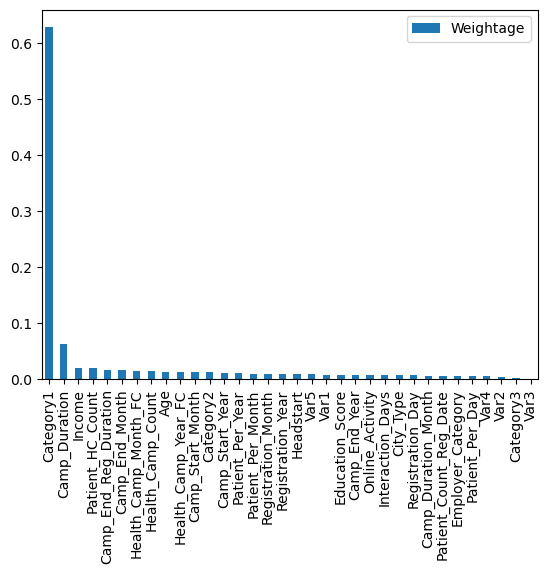

In [160]:
#Feature Importance: xgboost
pd.DataFrame(xgboost.feature_importances_,xgboost.feature_names_in_,
            columns=['Weightage']).sort_values(by='Weightage',ascending=False).plot(kind='bar')

<AxesSubplot:>

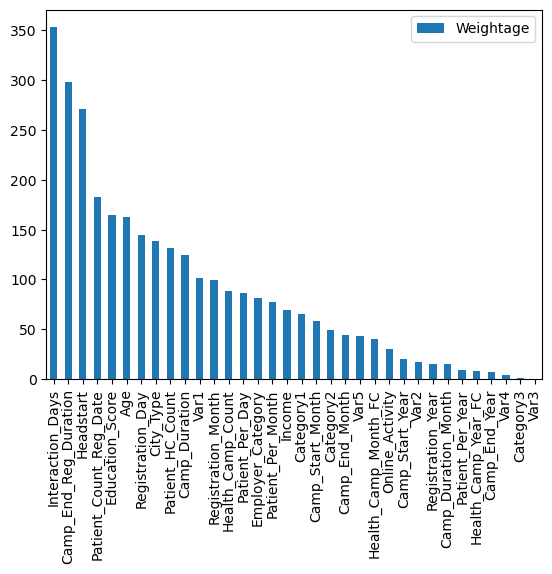

In [162]:
#Feature Importance: LGBM
pd.DataFrame(lgbm.feature_importances_,lgbm.feature_name_,
            columns=['Weightage']).sort_values(by='Weightage',ascending=False).plot(kind='bar')